In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
data_1 = pd.read_csv("C:\\Users\\noahf\\Downloads\\train.csv\\train.csv")
data_2 = pd.read_csv("C:\\Users\\noahf\\Downloads\\test.csv\\test.csv")
data_1 = np.array(data_1)
data_2 = np.array(data_2)

# m,o columns, n,p rows
m, n = data_1.shape
o, p = data_2.shape

# Shuffle before splitting into dev and training sets
np.random.shuffle(data_1)
np.random.shuffle(data_2)

print(m,n,o,p)

# Developping set
data_dev = data_1[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

# Testing set
data_test = data_2[:].T
X_test = data_test
X_test = X_test / 255

# Training set
data_train = data_1[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

42000 785 28000 784


In [35]:
# Initial parameters, set at random with value [-0.5;0.5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# Define the activation function ReLU(x) = x when x >= 0 ReLU(x) = 0 when x < 0
def ReLU(Z):
    return np.maximum(Z, 0)

# Define the softmax function
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

# Go from input X all the way to predicted Y (which is A2):
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Differentiate ReLU. Returns 1 when x >= 0, returns 0 when x < 0:
def ReLU_deriv(Z):
    return Z > 0

# Transform Y = 4 into Y = [0 0 0 0 1 0 0 0 0 0]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# Calculate by how much to adjust everything:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

# Adjust everything, based on backward_prop():
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

# If A2 = [0 0 0 1 ... 0], returns 3 and therefore predicts Y
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

# Main function that runs the whole thing
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

# Run model on training data
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1001)

Iteration:  0
[7 4 1 ... 4 1 2] [2 2 4 ... 5 6 1]
0.1155609756097561
Iteration:  10
[7 0 1 ... 0 1 8] [2 2 4 ... 5 6 1]
0.14858536585365853
Iteration:  20
[7 0 1 ... 0 1 1] [2 2 4 ... 5 6 1]
0.20385365853658535
Iteration:  30
[1 0 1 ... 0 1 1] [2 2 4 ... 5 6 1]
0.2571707317073171
Iteration:  40
[1 0 1 ... 0 1 1] [2 2 4 ... 5 6 1]
0.30290243902439024
Iteration:  50
[2 0 1 ... 0 1 1] [2 2 4 ... 5 6 1]
0.33995121951219515
Iteration:  60
[2 0 1 ... 0 1 1] [2 2 4 ... 5 6 1]
0.37070731707317073
Iteration:  70
[2 0 1 ... 0 1 1] [2 2 4 ... 5 6 1]
0.3959268292682927
Iteration:  80
[2 0 4 ... 0 1 1] [2 2 4 ... 5 6 1]
0.41892682926829267
Iteration:  90
[2 0 4 ... 0 1 1] [2 2 4 ... 5 6 1]
0.44390243902439025
Iteration:  100
[2 0 4 ... 0 1 1] [2 2 4 ... 5 6 1]
0.47829268292682925
Iteration:  110
[2 0 4 ... 0 1 1] [2 2 4 ... 5 6 1]
0.5129512195121951
Iteration:  120
[2 0 4 ... 5 1 1] [2 2 4 ... 5 6 1]
0.5441951219512196
Iteration:  130
[2 0 4 ... 5 1 1] [2 2 4 ... 5 6 1]
0.5740731707317073
Iteration

In [39]:
print(W1)
print(b1)
print(W2)
print(b2)

[[-0.0321651  -0.03543318  0.13882393 ... -0.33855691 -0.31101129
   0.26210136]
 [ 0.14963976 -0.14184278 -0.02046411 ...  0.34426941  0.18311148
  -0.37352019]
 [-0.24885259 -0.08547657  0.4359778  ...  0.29504776 -0.10841033
  -0.40163144]
 ...
 [-0.44007832  0.22609183 -0.41643468 ... -0.49001131 -0.23312517
  -0.35327929]
 [-0.22900158 -0.00226213  0.23758688 ... -0.47334284 -0.10989878
  -0.40407788]
 [-0.00374565  0.12738322 -0.31127698 ...  0.45005113  0.47012294
   0.43751576]]
[[1.03652335]
 [0.97657105]
 [1.26805206]
 [1.04004328]
 [0.84544165]
 [0.70948839]
 [1.65638937]
 [1.07610002]
 [1.37746521]
 [0.72140073]]
[[-9.30941459e-02 -1.10921256e+00 -8.96883809e-02 -3.92766184e-01
  -4.50349266e-01 -3.94523679e-02  5.53240823e-01  3.18291101e-03
   4.67875492e-02  6.66926388e-01]
 [-4.04597989e-01  3.16802028e-01  5.56799124e-01  8.26901447e-02
   9.76106208e-01 -5.22081228e-02 -8.37391487e-01 -5.43464338e-01
   3.52940669e-01 -6.98893820e-02]
 [ 3.91095882e-01 -1.94913916e-02

In [40]:
# Makes a prediction based on the value of A2
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

# Tests model on development data
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
print(get_accuracy(dev_predictions, Y_dev))

[6 2 5 5 7 6 2 7 4 1 7 7 8 9 1 3 9 3 9 2 9 3 5 1 4 3 9 9 9 1 9 5 7 6 2 3 3
 1 8 9 7 3 9 0 1 3 0 4 0 0 6 9 2 9 6 8 2 8 1 4 5 6 5 0 2 0 4 1 9 0 4 4 1 3
 5 2 2 1 4 2 7 3 2 9 1 3 9 3 7 5 0 0 1 2 6 8 9 2 2 3 7 4 8 1 1 4 0 2 3 6 0
 0 7 5 2 6 6 7 2 6 0 1 9 4 3 0 1 1 3 8 3 4 8 3 1 3 5 5 8 6 7 9 4 0 9 4 7 3
 9 1 9 3 7 1 4 4 9 4 0 2 3 9 2 8 1 1 4 4 0 2 6 6 0 7 1 4 9 3 2 1 2 6 7 6 7
 0 5 6 1 5 0 7 0 2 1 2 2 5 9 8 8 1 9 9 0 5 2 0 6 8 3 3 6 1 3 4 2 2 9 4 0 1
 0 7 5 5 7 8 9 2 7 3 5 4 7 0 3 5 7 5 8 3 7 0 7 7 9 4 0 1 5 1 5 3 0 9 4 5 4
 2 0 2 0 0 1 5 8 7 5 0 6 2 5 8 1 0 5 9 3 1 8 1 7 7 3 1 3 7 2 7 4 4 3 9 8 1
 6 3 1 4 1 1 7 0 4 6 5 3 5 6 0 1 1 6 4 0 6 1 1 9 5 7 9 0 6 5 5 0 1 6 9 4 7
 1 5 1 4 7 8 1 3 2 2 2 9 5 8 2 1 1 8 9 0 8 7 8 2 4 2 7 8 4 7 8 1 5 3 1 0 0
 9 4 5 3 8 8 2 1 0 3 7 2 7 0 7 0 8 7 0 3 6 2 3 6 9 6 6 1 7 9 4 6 0 9 2 8 6
 5 7 6 0 6 2 1 9 7 7 0 7 7 1 0 8 5 6 6 1 8 7 9 6 7 9 9 6 7 2 8 3 0 8 5 4 9
 8 1 1 3 8 0 5 9 8 3 5 9 1 2 6 2 4 7 3 3 8 9 2 4 9 3 5 9 7 9 8 7 2 3 1 1 6
 0 2 4 9 1 5 1 2 1 0 8 6 

Prediction:  [7]
Label:  9


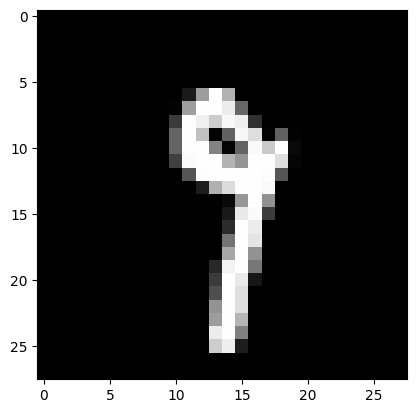

Prediction:  [4]
Label:  7


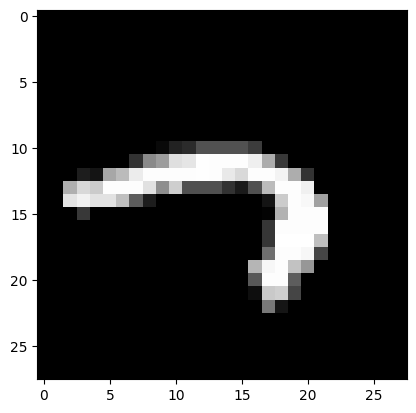

Prediction:  [9]
Label:  5


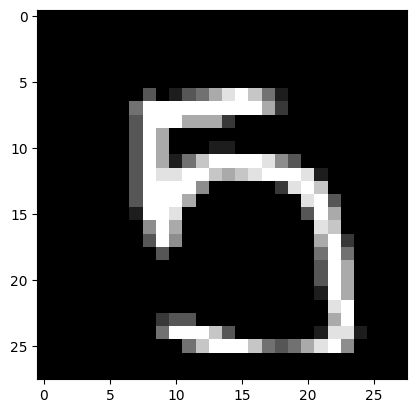

Prediction:  [5]
Label:  4


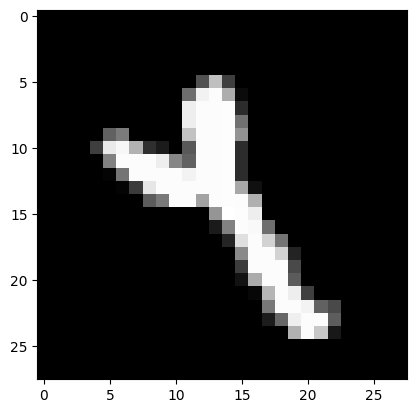

Prediction:  [4]
Label:  9


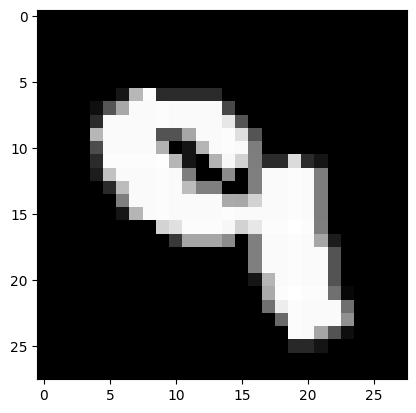

In [55]:
import random

# Tests prediction by showing prediction, label, and image
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

# Finds all the errors
error_index = []
for i in range(len(X_train[0])):
    if Y_train[i] != make_predictions(X_train[:, i, None], W1, b1, W2, b2):
        error_index.append(i)

# Show at random 5 errors:
for n in range(5):
    j = random.randint(0, len(error_index))
    test_prediction(error_index[j], W1, b1, W2, b2)

[0 8 3 ... 0 1 6]
Prediction:  [0]


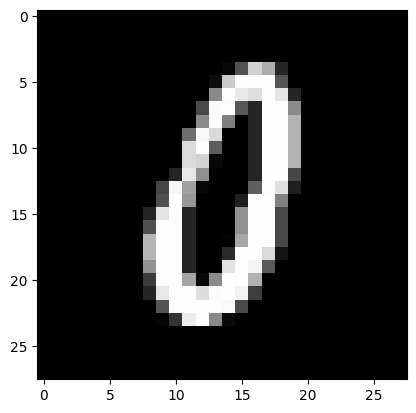

In [59]:
# Tests model on testing data
test_predictions = make_predictions(X_test, W1, b1, W2, b2)

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_test[:, index, None]
    prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2)
    print("Prediction: ", prediction)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

# Prints all predictions
print(test_predictions)

# Choose index and see whether what you predicted was true
index = 0
test_prediction(index, W1, b1, W2, b2)